In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/siim-medical-images/full_archive.npz
/kaggle/input/siim-medical-images/overview.csv
/kaggle/input/siim-medical-images/dicom_dir/ID_0015_AGE_0061_CONTRAST_1_CT.dcm
/kaggle/input/siim-medical-images/dicom_dir/ID_0019_AGE_0070_CONTRAST_1_CT.dcm
/kaggle/input/siim-medical-images/dicom_dir/ID_0063_AGE_0073_CONTRAST_0_CT.dcm
/kaggle/input/siim-medical-images/dicom_dir/ID_0077_AGE_0074_CONTRAST_0_CT.dcm
/kaggle/input/siim-medical-images/dicom_dir/ID_0073_AGE_0074_CONTRAST_0_CT.dcm
/kaggle/input/siim-medical-images/dicom_dir/ID_0060_AGE_0080_CONTRAST_0_CT.dcm
/kaggle/input/siim-medical-images/dicom_dir/ID_0051_AGE_0063_CONTRAST_0_CT.dcm
/kaggle/input/siim-medical-images/dicom_dir/ID_0091_AGE_0072_CONTRAST_0_CT.dcm
/kaggle/input/siim-medical-images/dicom_dir/ID_0004_AGE_0056_CONTRAST_1_CT.dcm
/kaggle/input/siim-medical-images/dicom_dir/ID_0076_AGE_0068_CONTRAST_0_CT.dcm
/kaggle/input/siim-medical-images/dicom_dir/ID_0055_AGE_0071_CONTRAST_0_CT.dcm
/kaggle/input/siim-medical-images

In [2]:
import numpy as np # matrix tools
import matplotlib.pyplot as plt # for basic plots
import seaborn as sns # for nicer plots
import pandas as pd
from glob import glob
import re
from skimage.io import imread

import keras

In [4]:
overview_df = pd.read_csv('../input/siim-medical-images/overview.csv')
overview_df.columns = ['idx']+list(overview_df.columns[1:])
overview_df['Contrast'] = overview_df['Contrast'].map(lambda x: 'Contrast' if x else 'No Contrast')
overview_df.sample(3)

,idx,Age,Contrast,ContrastTag,raw_input_path,id,tiff_name,dicom_name
50,50,74,No Contrast,NONE,../data/50_50_dicom_cases\No contrast\000001 (...,50,ID_0050_AGE_0074_CONTRAST_0_CT.tif,ID_0050_AGE_0074_CONTRAST_0_CT.dcm
39,39,74,Contrast,ISOVUE,../data/50_50_dicom_cases\Contrast\00001 (45).dcm,39,ID_0039_AGE_0074_CONTRAST_1_CT.tif,ID_0039_AGE_0074_CONTRAST_1_CT.dcm
85,85,67,No Contrast,NONE,../data/50_50_dicom_cases\No contrast\000001 (...,85,ID_0085_AGE_0067_CONTRAST_0_CT.tif,ID_0085_AGE_0067_CONTRAST_0_CT.dcm


In [9]:
IS_LOCAL = False
if(IS_LOCAL):
    PATH="../input/siim-medical-images/"
else:
    PATH="../input/siim-medical-images/"
print(os.listdir(PATH))
overview = pd.read_csv(os.path.join(PATH,"overview.csv"))
overview.head()

['dicom_dir', 'full_archive.npz', 'tiff_images', 'overview.csv']


,Unnamed: 0,Age,Contrast,ContrastTag,raw_input_path,id,tiff_name,dicom_name
0,0,60,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (1).dcm,0,ID_0000_AGE_0060_CONTRAST_1_CT.tif,ID_0000_AGE_0060_CONTRAST_1_CT.dcm
1,1,69,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (10).dcm,1,ID_0001_AGE_0069_CONTRAST_1_CT.tif,ID_0001_AGE_0069_CONTRAST_1_CT.dcm
2,2,74,True,APPLIED,../data/50_50_dicom_cases\Contrast\00001 (11).dcm,2,ID_0002_AGE_0074_CONTRAST_1_CT.tif,ID_0002_AGE_0074_CONTRAST_1_CT.dcm
3,3,75,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (12).dcm,3,ID_0003_AGE_0075_CONTRAST_1_CT.tif,ID_0003_AGE_0075_CONTRAST_1_CT.dcm
4,4,56,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (13).dcm,4,ID_0004_AGE_0056_CONTRAST_1_CT.tif,ID_0004_AGE_0056_CONTRAST_1_CT.dcm


In [10]:
len(overview)

100

In [12]:
overview['Contrast'] = overview['Contrast'].map(lambda x: 1 if x else 0)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

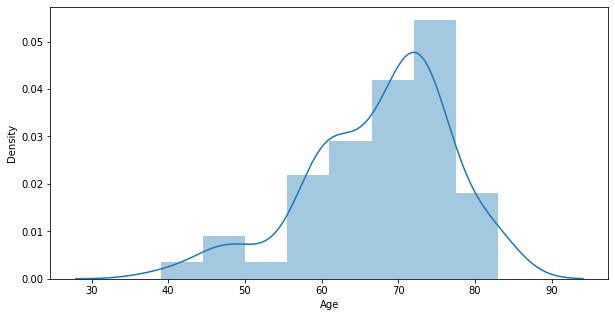

In [13]:
plt.figure(figsize=(10,5))
sns.distplot(overview['Age'])

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


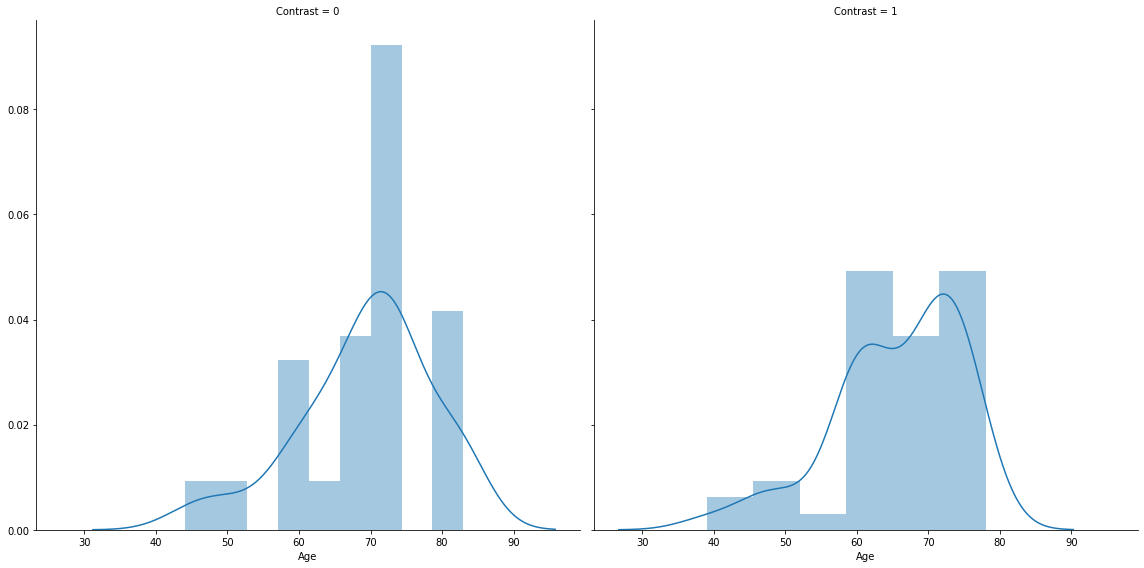

In [14]:
g = sns.FacetGrid(overview, col="Contrast", size=8)
g = g.map(sns.distplot, "Age")

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


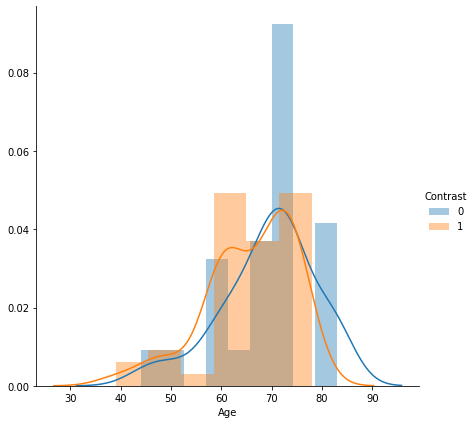

In [15]:
g = sns.FacetGrid(overview, hue="Contrast",size=6, legend_out=True)
g = g.map(sns.distplot, "Age").add_legend()

In [16]:
BASE_IMG_PATH='../input/siim-medical-images'
#print(os.listdir(BASE_IMG_PATH))
#print(os.path.join(BASE_IMG_PATH,'tiff_images','*.tif'))
all_images_list = glob(os.path.join(BASE_IMG_PATH,'tiff_images','*.tif'))
all_images_list[:5]
print(all_images_list)

['../input/siim-medical-images/tiff_images/ID_0027_AGE_0064_CONTRAST_1_CT.tif', '../input/siim-medical-images/tiff_images/ID_0096_AGE_0083_CONTRAST_0_CT.tif', '../input/siim-medical-images/tiff_images/ID_0073_AGE_0074_CONTRAST_0_CT.tif', '../input/siim-medical-images/tiff_images/ID_0046_AGE_0072_CONTRAST_1_CT.tif', '../input/siim-medical-images/tiff_images/ID_0052_AGE_0072_CONTRAST_0_CT.tif', '../input/siim-medical-images/tiff_images/ID_0015_AGE_0061_CONTRAST_1_CT.tif', '../input/siim-medical-images/tiff_images/ID_0009_AGE_0048_CONTRAST_1_CT.tif', '../input/siim-medical-images/tiff_images/ID_0048_AGE_0077_CONTRAST_1_CT.tif', '../input/siim-medical-images/tiff_images/ID_0020_AGE_0066_CONTRAST_1_CT.tif', '../input/siim-medical-images/tiff_images/ID_0055_AGE_0071_CONTRAST_0_CT.tif', '../input/siim-medical-images/tiff_images/ID_0077_AGE_0074_CONTRAST_0_CT.tif', '../input/siim-medical-images/tiff_images/ID_0086_AGE_0073_CONTRAST_0_CT.tif', '../input/siim-medical-images/tiff_images/ID_0005_A

In [17]:
imread(all_images_list[0]).shape

(512, 512)

In [18]:
np.array(np.arange(81)).reshape(9,9)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23, 24, 25, 26],
       [27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49, 50, 51, 52, 53],
       [54, 55, 56, 57, 58, 59, 60, 61, 62],
       [63, 64, 65, 66, 67, 68, 69, 70, 71],
       [72, 73, 74, 75, 76, 77, 78, 79, 80]])

In [19]:
np.array(np.arange(81)).reshape(9,9)[::3,::3]

array([[ 0,  3,  6],
       [27, 30, 33],
       [54, 57, 60]])

In [20]:
np.expand_dims(imread(all_images_list[0])[::4,::4],0).shape

(1, 128, 128)

In [21]:
jimread = lambda x: np.expand_dims(imread(x)[::2,::2],0)

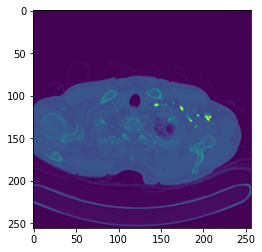

In [22]:
test_image = jimread(all_images_list[0])
plt.imshow(test_image[0])

In [23]:
check_contrast = re.compile(r'ID_([\d]+)_AGE_[\d]+_CONTRAST_([\d]+)_CT')
label = []
id_list = []
for image in all_images_list:
    id_list.append(check_contrast.findall(image)[0][0])
    label.append(check_contrast.findall(image)[0][1])

In [24]:
label_list = pd.DataFrame(label,id_list)

In [25]:
label_list.head()

,0
0027,1
0096,0
0073,0
0046,1
0052,0


In [26]:
images = np.stack([jimread(i) for i in all_images_list],0)

In [27]:
len(images)

100

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(images, label_list, test_size=0.1, random_state=0)

In [30]:
n_train, depth, width, height = X_train.shape
n_test,_,_,_ = X_test.shape

In [31]:
n_train,depth, width, height

(90, 1, 256, 256)

In [32]:
input_shape = (width,height,depth)

In [34]:
input_shape

(256, 256, 1)

In [35]:
input_train = X_train.reshape((n_train, width,height,depth))
input_train.shape
input_train.astype('float32')
input_train = input_train / np.max(input_train)
input_train.max()

1.0

In [36]:
input_test = X_test.reshape(n_test, *input_shape)
input_test.astype('float32')
input_test = input_test / np.max(input_test)

In [37]:
output_train = keras.utils.to_categorical(y_train, 2)
output_test = keras.utils.to_categorical(y_test, 2)
output_train[5]

array([0., 1.], dtype=float32)

In [38]:
input_train.shape

(90, 256, 256, 1)

In [39]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D

In [40]:
batch_size = 20
epochs = 40

In [41]:
model2 = Sequential()
model2.add(Conv2D(50, (5, 5), activation='relu', input_shape=input_shape))
 # 32 4x4 Filter  Convolutional Network
model2.add(MaxPooling2D(pool_size=(3, 3))) # 3x3 Maxpooling 
model2.add(Conv2D(30, (4, 4), activation='relu', input_shape=input_shape))
model2.add(MaxPooling2D(pool_size=(2, 2))) # 2x2 Maxpooling 
model2.add(Flatten()) #Fully Connected Neural Network 
model2.add(Dense(2, activation='softmax'))

In [43]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 252, 252, 50)      1300      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 84, 84, 50)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 81, 81, 30)        24030     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 40, 40, 30)        0         
_________________________________________________________________
flatten (Flatten)            (None, 48000)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 96002     
Total params: 121,332
Trainable params: 121,332
Non-trainable params: 0
__________________________________________________

In [42]:
model2.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [44]:
history = model2.fit(input_train, output_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(input_test, output_test))

Epoch 1/40
5/5 [==============================] - 5s 941ms/step - loss: 0.7381 - accuracy: 0.5891 - val_loss: 0.6799 - val_accuracy: 0.5000
Epoch 2/40
5/5 [==============================] - 5s 895ms/step - loss: 0.6568 - accuracy: 0.5514 - val_loss: 0.6239 - val_accuracy: 0.6000
Epoch 3/40
5/5 [==============================] - 5s 951ms/step - loss: 0.5454 - accuracy: 0.8324 - val_loss: 0.5290 - val_accuracy: 0.6000
Epoch 4/40
5/5 [==============================] - 4s 877ms/step - loss: 0.3709 - accuracy: 0.9583 - val_loss: 0.4145 - val_accuracy: 0.8000
Epoch 5/40
5/5 [==============================] - 5s 897ms/step - loss: 0.2344 - accuracy: 0.9391 - val_loss: 0.2568 - val_accuracy: 1.0000
Epoch 6/40
5/5 [==============================] - 4s 878ms/step - loss: 0.1271 - accuracy: 0.9884 - val_loss: 0.2252 - val_accuracy: 0.9000
Epoch 7/40
5/5 [==============================] - 5s 884ms/step - loss: 0.0645 - accuracy: 1.0000 - val_loss: 0.4580 - val_accuracy: 0.8000
Epoch 8/40
5/5 [====

In [45]:
score = model2.evaluate(input_test, output_test, verbose=0)
score

[0.27559399604797363, 0.8999999761581421]

In [46]:
model2.predict(input_test)

array([[9.3688577e-01, 6.3114218e-02],
       [1.3615945e-03, 9.9863845e-01],
       [9.9994588e-01, 5.4060860e-05],
       [5.9553188e-01, 4.0446812e-01],
       [2.9133065e-02, 9.7086698e-01],
       [8.7938875e-01, 1.2061129e-01],
       [9.8610270e-01, 1.3897288e-02],
       [3.2473046e-05, 9.9996758e-01],
       [9.8782128e-01, 1.2178767e-02],
       [1.4490952e-11, 1.0000000e+00]], dtype=float32)